# Preprocessing train data

In [1]:
import numpy as np 
import pandas as pd 


In [2]:
data = pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13174211 entries, 0 to 13174210
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      float64
 17  hq              float64
 18  music           float64
 19  level_group     object 
dtypes: float64(9), int64(4), object(7)
memory usage: 2.0+ GB


In [3]:
data

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22


##### As we could see, theres' over 13 000 000 rows and disk memory over 2.3 GB. Later we try to decrease this.

## 1. Have an Overview of data

In [4]:
data.describe(include='all')

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
count,1.317421e+07,1.317421e+07,1.317421e+07,13174211,13174211,1.317421e+07,284746.000000,1.213797e+07,1.213797e+07,1.213797e+07,1.213797e+07,1.000737e+06,4806891,9014563,13174211,4806945,0.0,0.0,0.0,13174211
unique,NaN,NaN,NaN,11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,594,127,19,126,NaN,NaN,NaN,3
top,NaN,NaN,NaN,navigate_click,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,worker,tunic.historicalsociety.entry,tunic.historicalsociety.cage.confrontation,NaN,NaN,NaN,13-22
freq,NaN,NaN,NaN,5687896,6377305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178294,939555,1816202,333363,NaN,NaN,NaN,6746397
mean,2.113413e+16,6.526426e+02,3.846817e+06,NaN,NaN,1.219194e+01,3.157930,-5.493615e+01,-1.162997e+02,4.581144e+02,3.852363e+02,3.186237e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.665220e+14,6.275818e+02,2.701387e+07,NaN,NaN,6.499188e+00,2.064042,5.201468e+02,2.185912e+02,2.472144e+02,1.292879e+02,3.692265e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.009031e+16,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000,-1.992355e+03,-9.181587e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.101031e+16,2.890000e+02,4.394300e+05,NaN,NaN,6.000000e+00,1.000000,-3.529376e+02,-2.128361e+02,2.690000e+02,3.040000e+02,1.000000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.104022e+16,5.960000e+02,1.013425e+06,NaN,NaN,1.300000e+01,3.000000,-1.116317e+01,-9.778151e+01,4.470000e+02,3.970000e+02,4.180000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.110051e+16,8.970000e+02,1.740050e+06,NaN,NaN,1.800000e+01,5.000000,2.963618e+02,2.268531e+01,6.630000e+02,4.710000e+02,1.266000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(data.head(50))

           session_id  index  elapsed_time          event_name       name  \
0   20090312431273200      0             0      cutscene_click      basic   
1   20090312431273200      1          1323        person_click      basic   
2   20090312431273200      2           831        person_click      basic   
3   20090312431273200      3          1147        person_click      basic   
4   20090312431273200      4          1863        person_click      basic   
5   20090312431273200      5          3423        person_click      basic   
6   20090312431273200      6          5197        person_click      basic   
7   20090312431273200      7          6180        person_click      basic   
8   20090312431273200      8          7014        person_click      basic   
9   20090312431273200      9          7946        person_click      basic   
10  20090312431273200     10          9133      navigate_click  undefined   
11  20090312431273200     11         10263        person_click      basic   

## 2. Wipe out NA values

##### Here we could see three columns all filled with NaN values. Drop them

In [6]:
## drop those columns as NA
data = data.drop(['music','hq','fullscreen'], axis=1)
print(data.head(50))

           session_id  index  elapsed_time          event_name       name  \
0   20090312431273200      0             0      cutscene_click      basic   
1   20090312431273200      1          1323        person_click      basic   
2   20090312431273200      2           831        person_click      basic   
3   20090312431273200      3          1147        person_click      basic   
4   20090312431273200      4          1863        person_click      basic   
5   20090312431273200      5          3423        person_click      basic   
6   20090312431273200      6          5197        person_click      basic   
7   20090312431273200      7          6180        person_click      basic   
8   20090312431273200      8          7014        person_click      basic   
9   20090312431273200      9          7946        person_click      basic   
10  20090312431273200     10          9133      navigate_click  undefined   
11  20090312431273200     11         10263        person_click      basic   

## 3 Change Data type to save memory space

In [7]:
data['elapsed_time'] = data['elapsed_time'].astype(np.uint32)
data['level'] = data['level'].astype(np.uint8)
data['room_coor_x'] = data['room_coor_x'].astype(np.float32)
data['room_coor_y'] = data['room_coor_y'].astype(np.float32)
data['screen_coor_x'] = data['screen_coor_x'].astype(np.float32)
data['screen_coor_y'] = data['screen_coor_y'].astype(np.float32)
data['hover_duration'] = data['hover_duration'].astype(np.float32)


columns_to_convert = ['session_id','event_name','name','text','fqid','room_fqid','text_fqid','level_group']

for column in columns_to_convert:
    data[column] = data[column].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13174211 entries, 0 to 13174210
Data columns (total 17 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      category
 1   index           int64   
 2   elapsed_time    uint32  
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            float64 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  level_group     category
dtypes: category(8), float32(5), float64(1), int64(1), uint32(1), uint8(1)
memory usage: 653.7 MB


##### Great! Now we reduced 2.3 GB to 653.7 MB, saved around 77% memory space!
##### However, the results of answer (which we need to predict is in another file), we combine it now

## 4. Combine Predictor Data

### 4.1 Preprocess Predictor Data

In [8]:
# import response data
predictorData = pd.read_csv("train_labels.csv")
predictorData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   session_id  212022 non-null  object
 1   correct     212022 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
predictorData.describe(include='all')

,session_id,correct
count,212022,212022.000000
unique,212022,NaN
top,20090312431273200_q1,NaN
freq,1,NaN
mean,NaN,0.703946
std,NaN,0.456516
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [10]:
print(predictorData.head(100))

              session_id  correct
0   20090312431273200_q1        1
1   20090312433251036_q1        0
2   20090314121766812_q1        1
3   20090314363702160_q1        1
4   20090314441803444_q1        1
..                   ...      ...
95  20100111290365256_q1        0
96  20100111293440890_q1        1
97  20100111315145150_q1        1
98  20100111354105336_q1        1
99  20100111374821010_q1        1

[100 rows x 2 columns]


##### As we see, we can't simply combine it as not well being preprocessed. 
##### We extract useful information now

In [11]:
# 1. split the "session_id" column into "sessionID" and "qns"
split_predictorData = predictorData['session_id'].str.split("_", expand=True)
# rename the headers
split_predictorData = split_predictorData.rename(columns={split_predictorData.columns[0]: 'sessionID', split_predictorData.columns[1]: 'qns'})
# combine the dataframe of the 2 split items and the correct column of the original dataframe
processed_predictorData = pd.concat([split_predictorData, predictorData['correct']], axis=1)
#change datatype for 'correct' column from int64 to object (CONSIDER 'BOOL' INSTEAD)
processed_predictorData['correct'] = processed_predictorData['correct'].astype('object')

# 2. split the "qns" column into "q" and "question id"
split_qns = processed_predictorData['qns'].str.split("q", expand=True)
split_qns = split_qns.rename(columns={split_qns.columns[0]: 'q', split_qns.columns[1]: 'qns'})
# combine the dataframe of the 'qns' into processed_predictorData
processed_predictorData_sortedBySessionID = pd.concat([processed_predictorData['sessionID'], split_qns['qns'], processed_predictorData['correct']], axis=1)
# convert the datatype of qns to integer for sorting
processed_predictorData_sortedBySessionID['qns'] = processed_predictorData_sortedBySessionID['qns'].astype('int')
# sort the dataset according to ascending order of the 'sessionID' and 'qns'
processed_predictorData_sortedBySessionID = processed_predictorData_sortedBySessionID.sort_values(['sessionID', 'qns'], ascending=[True, True])
# reset the index
processed_predictorData_sortedBySessionID = processed_predictorData_sortedBySessionID.reset_index(drop=True)
processed_predictorData_sortedBySessionID.info()

# 3. Have a overview of data
print(processed_predictorData_sortedBySessionID.head(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sessionID  212022 non-null  object
 1   qns        212022 non-null  int32 
 2   correct    212022 non-null  object
dtypes: int32(1), object(2)
memory usage: 4.0+ MB
            sessionID  qns correct
0   20090312431273200    1       1
1   20090312431273200    2       1
2   20090312431273200    3       1
3   20090312431273200    4       1
4   20090312431273200    5       1
5   20090312431273200    6       1
6   20090312431273200    7       1
7   20090312431273200    8       1
8   20090312431273200    9       1
9   20090312431273200   10       1
10  20090312431273200   11       1
11  20090312431273200   12       1
12  20090312431273200   13       0
13  20090312431273200   14       1
14  20090312431273200   15       1
15  20090312431273200   16       0
16  20090312431273200   17       1
17  200903

### 4.2 Combine with train data by splitting into 3 sections 

#### To further reduce data set and implement data science skills we learned, we extract one characteristic value for each column and merge it with the results dataframe for future prediction.

##### We train one model for each of 18 questions. Furthermore, we use data from level_groups = '0-4' to train model for questions 1-3, and level groups '5-12' to train questions 4 thru 13 and level groups '13-22' to train questions 14 thru 18. Because this is the data we get (to predict corresponding questions) from Kaggle's inference API during test inference. We can improve our model by saving a user's previous data from earlier level_groups and using that to predict future level_groups

##### First we divide predictor data into three session

In [12]:
sub1 = processed_predictorData_sortedBySessionID[processed_predictorData_sortedBySessionID['qns']<4]
sub1 = sub1.sort_values(['sessionID', 'qns']).reset_index()
sub1 = sub1.drop(['index'],axis=1)

sub2 = processed_predictorData_sortedBySessionID[processed_predictorData_sortedBySessionID['qns']>=4]
sub2 = sub2[sub2['qns']<14]
sub2 = sub2.sort_values(['sessionID', 'qns']).reset_index()
sub2 = sub2.drop(['index'],axis=1)

sub3 = processed_predictorData_sortedBySessionID[processed_predictorData_sortedBySessionID['qns']>=14]
sub3 = sub3.sort_values(['sessionID', 'qns']).reset_index()
sub3 = sub3.drop(['index'],axis=1)

display(
sub1,
sub2.head(20),
sub3)

,sessionID,qns,correct
0,20090312431273200,1,1
1,20090312431273200,2,1
2,20090312431273200,3,1
3,20090312433251036,1,0
4,20090312433251036,2,1
...,...,...,...
35332,22100219442786200,2,1
35333,22100219442786200,3,1
35334,22100221145014656,1,0
35335,22100221145014656,2,1


,sessionID,qns,correct
0,20090312431273200,4,1
1,20090312431273200,5,1
2,20090312431273200,6,1
3,20090312431273200,7,1
4,20090312431273200,8,1
5,20090312431273200,9,1
6,20090312431273200,10,1
7,20090312431273200,11,1
8,20090312431273200,12,1
9,20090312431273200,13,0


,sessionID,qns,correct
0,20090312431273200,14,1
1,20090312431273200,15,1
2,20090312431273200,16,0
3,20090312431273200,17,1
4,20090312431273200,18,1
...,...,...,...
58890,22100221145014656,14,0
58891,22100221145014656,15,0
58892,22100221145014656,16,0
58893,22100221145014656,17,1


### Then we start to divide variable dataframe according to game stages

In [13]:
test = data.sort_values(['session_id', 'level_group'], ascending=[True, True])
test

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13173446,22100221145014656,795,3664936,navigate_click,undefined,12,NaN,939.575623,92.873199,805.0,268.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173447,22100221145014656,796,3665912,map_hover,basic,12,NaN,NaN,NaN,NaN,NaN,600.0,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173448,22100221145014656,797,3666188,map_click,undefined,12,NaN,486.913300,50.747986,465.0,298.0,NaN,NaN,tunic.capitol_1,tunic.historicalsociety.entry,NaN,5-12
13173449,22100221145014656,798,3667021,navigate_click,undefined,12,NaN,210.553955,-140.571701,395.0,390.0,NaN,NaN,chap2_finale_c,tunic.capitol_1.hall,NaN,5-12


##### Section 1

In [14]:
data1 = test[test['level_group'] == '0-4']
data1

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13172870,22100221145014656,206,352635,navigate_click,undefined,4,NaN,-914.204224,-50.000000,26.0,380.0,NaN,NaN,toentry,tunic.kohlcenter.halloffame,NaN,0-4
13172871,22100221145014656,207,353336,map_hover,basic,4,NaN,NaN,NaN,NaN,NaN,84.0,NaN,tunic.kohlcenter,tunic.kohlcenter.halloffame,NaN,0-4
13172872,22100221145014656,208,354020,map_click,undefined,4,NaN,-549.217712,-2.000000,449.0,332.0,NaN,NaN,tunic.capitol_0,tunic.kohlcenter.halloffame,NaN,0-4
13172873,22100221145014656,209,356238,navigate_click,undefined,4,NaN,313.584259,107.913147,463.0,226.0,NaN,NaN,chap1_finale,tunic.capitol_0.hall,NaN,0-4


## How do we extract each characteristic value for each column?


### 1. Elapsed_time -> (total) elasped_time: The last value of each participant, which is the total time of elapsed time.
### 2. Event_name && Name -> Most click type: After deleting the most common navigate_click(click to proceed moving forward in game), we retain select the most click type (map, object, notebook, person)
### 3. Level -> deletion. As it only indicates which stage of game.
### 4. Page -> (bool) this value represents whether player clicked notebook or not. (Notebook is important for clue collection)
### 5. "room_coor_x	room_coor_y	screen_coor_x	screen_coor_y" -> Fullscreen. Although fullscreen is NaN and thus deleted previously, by evaluating those four parameters, we can derive whether it's fullscreen or not.
### 6. Hover_duration-> (mean) hover_duration. It reflects how long does the play pause the mouse.
### 7. "text	 fqid	room_fqid	text_fqid"-> deletion. As it's just the responses from game NPCs.
### 8. "level_group correct" : retain

## Overall for categorical values, since we're preprocessing them into binary categorical values, we temtatively just use label encoding rather than one-hot encoding as one-hot encoding may not provide significant benefits but also creates too many columns.

In [15]:
# factor 1
total_elapsed_time = data1.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# factor 2
filtered_data = data1[(data1['event_name'] != 'navigate_click') & (data1['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# factor 3
avg_page = data1.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# factor 4

# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data1.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data1['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})



# factor 5
avg_hover_duration = data1.groupby(['session_id'])['hover_duration'].mean().reset_index()

# Merge
temp_level_group = pd.DataFrame({'level_group': ['0-4'] * 11779})
part1 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)


part1 = pd.concat([part1]*3, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

for i in range(0,35337):
    if (i%3) == 0:
        part1.iloc[i, -1] = 1
    elif (i%3) == 1:
        part1.iloc[i, -1] = 2
    elif (i%3) == 2:
        part1.iloc[i, -1] = 3
        
part1 = part1.rename(columns={'level_group': 'qns'})
part1 = pd.concat([part1, sub1['correct']], axis = 1)

part1.head(60)

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.500000,1,1
1,20090312431273200,194860,person_click,0,1,2389.500000,2,1
2,20090312431273200,194860,person_click,0,1,2389.500000,3,1
3,20090312433251036,233752,person_click,1,1,1378.750000,1,0
4,20090312433251036,233752,person_click,1,1,1378.750000,2,1
5,20090312433251036,233752,person_click,1,1,1378.750000,3,1
6,20090314121766812,393360,object_click,1,1,1603.400024,1,1
7,20090314121766812,393360,object_click,1,1,1603.400024,2,1
8,20090314121766812,393360,object_click,1,1,1603.400024,3,1
9,20090314363702160,217574,person_click,0,1,4768.000000,1,1


##### Section 2

In [16]:
data2 = test[test['level_group'] == '5-12']
data2

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
165,20090312431273200,175,221485,navigate_click,undefined,5,NaN,280.442169,-19.705837,653.0,321.0,NaN,NaN,boss,tunic.capitol_0.hall,NaN,5-12
166,20090312431273200,176,222334,person_click,basic,5,NaN,272.983490,-19.233582,649.0,321.0,NaN,"What are you still doing here, Jolie?",boss,tunic.capitol_0.hall,tunic.capitol_0.hall.boss.talktogramps,5-12
167,20090312431273200,177,223251,person_click,basic,5,NaN,240.848419,-228.217453,628.0,459.0,NaN,Go find your grampa and get to work!,boss,tunic.capitol_0.hall,tunic.capitol_0.hall.boss.talktogramps,5-12
168,20090312431273200,178,223735,navigate_click,undefined,5,NaN,331.714691,-220.627228,688.0,454.0,NaN,NaN,NaN,tunic.capitol_0.hall,NaN,5-12
169,20090312431273200,179,224235,navigate_click,undefined,5,NaN,404.147217,-226.491394,716.0,454.0,NaN,NaN,NaN,tunic.capitol_0.hall,NaN,5-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13173446,22100221145014656,795,3664936,navigate_click,undefined,12,NaN,939.575623,92.873199,805.0,268.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173447,22100221145014656,796,3665912,map_hover,basic,12,NaN,NaN,NaN,NaN,NaN,600.0,NaN,tomap,tunic.historicalsociety.entry,NaN,5-12
13173448,22100221145014656,797,3666188,map_click,undefined,12,NaN,486.913300,50.747986,465.0,298.0,NaN,NaN,tunic.capitol_1,tunic.historicalsociety.entry,NaN,5-12
13173449,22100221145014656,798,3667021,navigate_click,undefined,12,NaN,210.553955,-140.571701,395.0,390.0,NaN,NaN,chap2_finale_c,tunic.capitol_1.hall,NaN,5-12


In [17]:
# factor 1
total_elapsed_time = data2.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# factor 2
filtered_data = data2[(data2['event_name'] != 'navigate_click') & (data2['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# factor 3
avg_page = data2.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# factor 4

# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data2.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data2['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})



# factor 5
avg_hover_duration = data2.groupby(['session_id'])['hover_duration'].mean().reset_index()

# Merge
temp_level_group = pd.DataFrame({'level_group': ['5-12'] * 11779})
part2 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)

part2 = pd.concat([part2]*10, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

values = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i in range(0,117790):
    part2.iloc[i, -1] = values[i % len(values)]
        
part2 = part2.rename(columns={'level_group': 'qns'})
part2 = pd.concat([part2, sub2['correct']], axis = 1)

part2.head(30)


,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,499235,person_click,0,1,969.333313,4,1
1,20090312431273200,499235,person_click,0,1,969.333313,5,1
2,20090312431273200,499235,person_click,0,1,969.333313,6,1
3,20090312431273200,499235,person_click,0,1,969.333313,7,1
4,20090312431273200,499235,person_click,0,1,969.333313,8,1
5,20090312431273200,499235,person_click,0,1,969.333313,9,1
6,20090312431273200,499235,person_click,0,1,969.333313,10,1
7,20090312431273200,499235,person_click,0,1,969.333313,11,1
8,20090312431273200,499235,person_click,0,1,969.333313,12,1
9,20090312431273200,499235,person_click,0,1,969.333313,13,0


##### Section 3

In [18]:
data3 = test[test['level_group'] == '13-22']
data3

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
461,20090312431273200,512,836732,navigate_click,undefined,13,NaN,290.153564,-204.499359,651.0,445.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
462,20090312431273200,513,837245,navigate_click,undefined,13,NaN,353.805603,-210.332062,672.0,445.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
463,20090312431273200,514,837779,navigate_click,undefined,13,NaN,587.680054,-280.706238,780.0,489.0,NaN,NaN,NaN,tunic.capitol_1.hall,NaN,13-22
464,20090312431273200,515,838446,navigate_click,undefined,13,NaN,751.496887,-102.153290,823.0,365.0,NaN,NaN,toentry,tunic.capitol_1.hall,NaN,13-22
465,20090312431273200,516,839629,map_hover,basic,13,NaN,NaN,NaN,NaN,NaN,67.0,NaN,tunic.drycleaner,tunic.capitol_1.hall,NaN,13-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887299,36.701027,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696075,141.493179,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912872,140.569199,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299652,123.805893,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22


In [19]:
# factor 1
total_elapsed_time = data3.groupby(['session_id'])['elapsed_time'].tail(1).reset_index()

# factor 2
filtered_data = data3[(data3['event_name'] != 'navigate_click') & (data3['event_name'] != 'cutscene_click')]
mode_event_name = filtered_data.groupby(['session_id'])['event_name'].apply(lambda x: x.mode()[0]).reset_index()

# factor 3
avg_page = data3.groupby(['session_id'])['page'].max().notnull().astype(int).reset_index()
avg_page = avg_page.rename(columns={'page': 'avg_page'})

# factor 4

# Find the maximum values of room_coor_x, screen_coor_x, room_coor_y, and screen_coor_y for each unique session_id
max_values = data3.groupby('session_id')[['room_coor_x', 'screen_coor_x', 'room_coor_y', 'screen_coor_y']].max()

# Create a new column named 'fullscreen' in the max_values dataframe that checks if the maximum room_coor_x is equal to the maximum screen_coor_x
max_values['fullscreen'] = (max_values['room_coor_x'] > 880) | (max_values['room_coor_y'] > 660)

# Create a new dataframe named 'fullscreen_df' that only contains the session_id and fullscreen columns from the max_values dataframe
fullscreen_df = max_values['fullscreen'].astype(int).reset_index()

# Merge the 'fullscreen' column with the unique 'session_id' column using an outer join on the 'session_id' column
unique_session_ids = data3['session_id'].unique()
unique_session_ids_df = pd.DataFrame({'session_id': unique_session_ids})
unique_session_ids_fullscreen = pd.merge(unique_session_ids_df, fullscreen_df, on='session_id', how='outer')

# Rename the 'fullscreen' column to 'fullscreen_flag'
unique_session_ids_fullscreen = unique_session_ids_fullscreen.rename(columns={'fullscreen': 'fullscreen_flag'})



# factor 5
avg_hover_duration = data3.groupby(['session_id'])['hover_duration'].mean().reset_index()

# Merge
temp_level_group = pd.DataFrame({'level_group': ['13-22'] * 11779})
part3 = pd.concat([avg_hover_duration['session_id'], 
                   total_elapsed_time['elapsed_time'], 
                   mode_event_name['event_name'], avg_page['avg_page'],
                     unique_session_ids_fullscreen['fullscreen_flag'],
                       avg_hover_duration['hover_duration'], 
                         temp_level_group['level_group']]
                          , axis = 1)

part3 = pd.concat([part3]*5, ignore_index=True).sort_values(['session_id']).reset_index().drop(['index'], axis=1)

values = [14, 15, 16, 17, 18]
for i in range(0,58895):
    part3.iloc[i, -1] = values[i % len(values)]
        
part3 = part3.rename(columns={'level_group': 'qns'})
part3 = pd.concat([part3, sub3['correct']], axis = 1)

part3

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,1272679,person_click,0,1,899.925903,14,1
1,20090312431273200,1272679,person_click,0,1,899.925903,15,1
2,20090312431273200,1272679,person_click,0,1,899.925903,16,0
3,20090312431273200,1272679,person_click,0,1,899.925903,17,1
4,20090312431273200,1272679,person_click,0,1,899.925903,18,1
...,...,...,...,...,...,...,...,...
58890,22100221145014656,5487952,person_click,1,1,669.000000,14,0
58891,22100221145014656,5487952,person_click,1,1,669.000000,15,0
58892,22100221145014656,5487952,person_click,1,1,669.000000,16,0
58893,22100221145014656,5487952,person_click,1,1,669.000000,17,1


### 4.3 Final Step for combining dataset together

In [20]:
new_data = pd.concat([part1, part2, part3], axis = 0)
new_data

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.50,1,1
1,20090312431273200,194860,person_click,0,1,2389.50,2,1
2,20090312431273200,194860,person_click,0,1,2389.50,3,1
3,20090312433251036,233752,person_click,1,1,1378.75,1,0
4,20090312433251036,233752,person_click,1,1,1378.75,2,1
...,...,...,...,...,...,...,...,...
58890,22100221145014656,5487952,person_click,1,1,669.00,14,0
58891,22100221145014656,5487952,person_click,1,1,669.00,15,0
58892,22100221145014656,5487952,person_click,1,1,669.00,16,0
58893,22100221145014656,5487952,person_click,1,1,669.00,17,1


In [21]:
new_data = new_data.sort_values(['session_id', 'qns'], ascending=[True, True]).reset_index().drop(['index'], axis=1)
new_data

,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.500000,1,1
1,20090312431273200,194860,person_click,0,1,2389.500000,2,1
2,20090312431273200,194860,person_click,0,1,2389.500000,3,1
3,20090312431273200,499235,person_click,0,1,969.333313,4,1
4,20090312431273200,499235,person_click,0,1,969.333313,5,1
...,...,...,...,...,...,...,...,...
212017,22100221145014656,5487952,person_click,1,1,669.000000,14,0
212018,22100221145014656,5487952,person_click,1,1,669.000000,15,0
212019,22100221145014656,5487952,person_click,1,1,669.000000,16,0
212020,22100221145014656,5487952,person_click,1,1,669.000000,17,1


### As shown above, for each player we divide the whole process into 3 stages according to level group, and for each stage we extract characteristic data and form 5 total columns that related to their performance. And then we append the 18 qns' results in the end of each row for each participants. In total there's 18 qns * 11779 participants = 212022 rows, and 8 columns. EDA can start with this new_data.

## 3.4 XGBoost

In [22]:
import pandas as pd, numpy as np, gc
from sklearn.model_selection import KFold, GroupKFold
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [23]:
# READ USER ID ONLY
tmp = new_data
tmp = tmp.groupby('session_id').session_id.agg('count')

# COMPUTE READS AND SKIPS
PIECES = 10
CHUNK = int( np.ceil(len(tmp)/PIECES) )

reads = []
skips = [0]
for k in range(PIECES):
    a = k*CHUNK
    b = (k+1)*CHUNK
    if b>len(tmp): b=len(tmp)
    r = tmp.iloc[a:b].sum()
    reads.append(r)
    skips.append(skips[-1]+r)
    
# print(f'To avoid memory error, we will read train in {PIECES} pieces of sizes:')
reads

[21204, 21204, 21204, 21204, 21204, 21204, 21204, 21204, 21204, 21186]

In [24]:
train = new_data.head(reads[0])
print('Train size of first piece:', train.shape )
train

Train size of first piece: (21204, 8)


,session_id,elapsed_time,event_name,avg_page,fullscreen_flag,hover_duration,qns,correct
0,20090312431273200,194860,person_click,0,1,2389.500000,1,1
1,20090312431273200,194860,person_click,0,1,2389.500000,2,1
2,20090312431273200,194860,person_click,0,1,2389.500000,3,1
3,20090312431273200,499235,person_click,0,1,969.333313,4,1
4,20090312431273200,499235,person_click,0,1,969.333313,5,1
...,...,...,...,...,...,...,...,...
21199,20110407475987624,9935950,person_click,1,1,773.117676,14,0
21200,20110407475987624,9935950,person_click,1,1,773.117676,15,1
21201,20110407475987624,9935950,person_click,1,1,773.117676,16,1
21202,20110407475987624,9935950,person_click,1,1,773.117676,17,1


In [25]:
CATS = ['event_name']
NUMS = ['elapsed_time','avg_page','fullscreen_flag','hover_duration']

# https://www.kaggle.com/code/kimtaehun/lightgbm-baseline-with-aggregated-log-data
EVENTS = ['person_click','object_click',
          'map_hover','notification_click','map_click','observation_click',
          'checkpoint']

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()


# OneHotEncoding of categorical predictors (not the response)
new_data_cat = new_data[['event_name']]
ohe.fit(new_data_cat)
new_data_cat_ohe = pd.DataFrame(ohe.transform(new_data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(new_data_cat.columns))

# Check the encoded variables
new_data_cat_ohe.info()
new_data_cat_ohe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   event_name_map_click           212022 non-null  float64
 1   event_name_map_hover           212022 non-null  float64
 2   event_name_notebook_click      212022 non-null  float64
 3   event_name_notification_click  212022 non-null  float64
 4   event_name_object_click        212022 non-null  float64
 5   event_name_object_hover        212022 non-null  float64
 6   event_name_observation_click   212022 non-null  float64
 7   event_name_person_click        212022 non-null  float64
dtypes: float64(8)
memory usage: 12.9 MB


,event_name_map_click,event_name_map_hover,event_name_notebook_click,event_name_notification_click,event_name_object_click,event_name_object_hover,event_name_observation_click,event_name_person_click
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
212017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
# Combine with original data
new_data_num = new_data[['session_id','elapsed_time','avg_page','fullscreen_flag','hover_duration','qns']]
new_data_res = new_data['correct']
ohe_data = pd.concat([new_data_num, new_data_cat_ohe, new_data_res], 
                           sort = False, axis = 1).reindex(index=new_data_num.index)

# Check the final dataframe
ohe_data.info()
ohe_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212022 entries, 0 to 212021
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   session_id                     212022 non-null  category
 1   elapsed_time                   212022 non-null  uint32  
 2   avg_page                       212022 non-null  int32   
 3   fullscreen_flag                212022 non-null  int32   
 4   hover_duration                 195210 non-null  float32 
 5   qns                            212022 non-null  object  
 6   event_name_map_click           212022 non-null  float64 
 7   event_name_map_hover           212022 non-null  float64 
 8   event_name_notebook_click      212022 non-null  float64 
 9   event_name_notification_click  212022 non-null  float64 
 10  event_name_object_click        212022 non-null  float64 
 11  event_name_object_hover        212022 non-null  float64 
 12  event_name_obser

,session_id,elapsed_time,avg_page,fullscreen_flag,hover_duration,qns,event_name_map_click,event_name_map_hover,event_name_notebook_click,event_name_notification_click,event_name_object_click,event_name_object_hover,event_name_observation_click,event_name_person_click,correct
0,20090312431273200,194860,0,1,2389.500000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,20090312431273200,194860,0,1,2389.500000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,20090312431273200,194860,0,1,2389.500000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,20090312431273200,499235,0,1,969.333313,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,20090312431273200,499235,0,1,969.333313,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212017,22100221145014656,5487952,1,1,669.000000,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
212018,22100221145014656,5487952,1,1,669.000000,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
212019,22100221145014656,5487952,1,1,669.000000,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
212020,22100221145014656,5487952,1,1,669.000000,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [28]:
def feature_engineer(train):
    
    dfs = []
    for c in CATS:
        tmp = train.groupby(['session_id','qns'])[c].agg('nunique')
        tmp.name = tmp.name + '_nunique'
        dfs.append(tmp)
    for c in NUMS:
        tmp = train.groupby(['session_id','qns'])[c].agg('mean')
        tmp.name = tmp.name + '_mean'
        dfs.append(tmp)
    for c in NUMS:
        tmp = train.groupby(['session_id','qns'])[c].agg('std')
        tmp.name = tmp.name + '_std'
        dfs.append(tmp)
    for c in EVENTS: 
        train[c] = (train.event_name == c).astype('int8')
    for c in EVENTS + ['elapsed_time']:
        tmp = train.groupby(['session_id','qns'])[c].agg('sum')
        tmp.name = tmp.name + '_sum'
        dfs.append(tmp)
    train = train.drop(EVENTS,axis=1)
        
    df = pd.concat(dfs,axis=1)
    df = df.fillna(-1)
    df = df.reset_index()
    df = df.set_index('session_id')
    return df

In [29]:
targets = pd.read_csv('train_labels.csv')
targets['session'] = targets.session_id.apply(lambda x: int(x.split('_')[0]) )
targets['q'] = targets.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )

In [30]:
%%time

# PROCESS TRAIN DATA IN PIECES
# all_pieces = []
# print(f'Processing train as {PIECES} pieces to avoid memory error... ')
# for k in range(PIECES):
#     print(k,', ',end='')
#     SKIPS = 0
#     if k>0: SKIPS = range(1,skips[k]+1)
#     train = pd.read_csv('train.csv',
#                         nrows=reads[k], skiprows=SKIPS)
#     df = feature_engineer(train)
#     all_pieces.append(df)
    
# # CONCATENATE ALL PIECES
# print('\n')
# del train; gc.collect()
# df = pd.concat(all_pieces, axis=0)
# print('Shape of all train data after feature engineering:', df.shape )
# df.head()

# df = feature_engineer(new_data)
# df
# df = ohe_data
# df.set_index('session_id')

Wall time: 0 ns


In [31]:
df = ohe_data
tmp = df['qns']
df = df.drop('qns', axis=1)
df.insert(1, 'qns', tmp)
df = df.set_index('session_id')
df = df.drop('correct', axis=1)
df

,qns,elapsed_time,avg_page,fullscreen_flag,hover_duration,event_name_map_click,event_name_map_hover,event_name_notebook_click,event_name_notification_click,event_name_object_click,event_name_object_hover,event_name_observation_click,event_name_person_click
session_id,,,,,,,,,,,,,
20090312431273200,1,194860,0,1,2389.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20090312431273200,2,194860,0,1,2389.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20090312431273200,3,194860,0,1,2389.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20090312431273200,4,499235,0,1,969.333313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20090312431273200,5,499235,0,1,969.333313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100221145014656,14,5487952,1,1,669.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22100221145014656,15,5487952,1,1,669.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22100221145014656,16,5487952,1,1,669.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
FEATURES = [c for c in df.columns if c != 'qns']
print('We will train with', len(FEATURES) ,'features')
ALL_USERS = df.index.unique()
print('We will train with', len(ALL_USERS) ,'users info')

We will train with 12 features
We will train with 11779 users info


In [34]:
gkf = GroupKFold(n_splits=5)
oof = pd.DataFrame(data=np.zeros((len(ALL_USERS),18)), index=ALL_USERS)
models = {}

# COMPUTE CV SCORE WITH 5 GROUP K FOLD
for i, (train_index, test_index) in enumerate(gkf.split(X=df, groups=df.index)):
    print('#'*25)
    print('### Fold',i+1)
    print('#'*25)
    
    xgb_params = {
    'objective' : 'binary:logistic',
    'eval_metric':'logloss',
    'learning_rate': 0.05,
    'max_depth': 4,
    'n_estimators': 1000,
    'early_stopping_rounds': 50,
    'tree_method':'hist',
    'subsample':0.8,
    'colsample_bytree': 0.4,
    'use_label_encoder' : False}
    
    # ITERATE THRU QUESTIONS 1 THRU 18
    for t in range(1,19):
        
        # USE THIS TRAIN DATA WITH THESE QUESTIONS
#         if t<=3: grp = '0-4'
#         elif t<=13: grp = '5-12'
#         elif t<=22: grp = '13-22'
        grp = t
            
        # TRAIN DATA
        train_x = df.iloc[train_index]
        train_x = train_x.loc[train_x.qns == grp]
        train_users = train_x.index.values
        train_y = targets.loc[targets.q==t].set_index('session').loc[train_users]
        
        # VALID DATA
        valid_x = df.iloc[test_index]
        valid_x = valid_x.loc[valid_x.qns == grp]
        valid_users = valid_x.index.values
        valid_y = targets.loc[targets.q==t].set_index('session').loc[valid_users]
        
        # TRAIN MODEL        
        clf =  XGBClassifier(**xgb_params)
        clf.fit(train_x[FEATURES].astype('float32'), train_y['correct'],
                eval_set=[ (valid_x[FEATURES].astype('float32'), valid_y['correct']) ],
                verbose=0)
        print(f'{t}({clf.best_ntree_limit}), ',end='')
        
        # SAVE MODEL, PREDICT VALID OOF
        models[f'{grp}_{t}'] = clf
        oof.loc[valid_users, t-1] = clf.predict_proba(valid_x[FEATURES].astype('float32'))[:,1]
        
    print()

#########################
### Fold 1
#########################


D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


1(104), 2(152), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


3(119), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


4(208), 5(99), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


6(183), 7(77), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


8(84), 9(80), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


10(91), 11(142), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


12(106), 13(91), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


14(214), 15(99), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


16(62), 17(99), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


18(231), 
#########################
### Fold 2
#########################
1(116), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


2(112), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


3(177), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


4(205), 5(131), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


6(166), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


7(213), 8(54), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


9(133), 10(151), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


11(59), 12(83), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


13(57), 14(104), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


15(141), 16(88), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


17(44), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


18(175), 
#########################
### Fold 3
#########################
1(47), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


2(170), 3(105), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


4(72), 5(57), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


6(67), 7(75), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


8(47), 9(91), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


10(47), 11(109), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


12(104), 13(99), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


14(177), 15(113), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


16(100), 17(123), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


18(143), 
#########################
### Fold 4
#########################
1(76), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


2(110), 3(130), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


4(139), 5(114), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


6(170), 7(98), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


8(36), 9(92), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


10(76), 11(221), 12(102), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


13(85), 14(143), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


15(150), 16(64), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


17(58), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


18(240), 
#########################
### Fold 5
#########################
1(69), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


2(159), 3(86), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


4(88), 5(70), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


6(142), 7(142), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


8(68), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


9(201), 10(111), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


11(68), 12(122), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


13(93), 14(64), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


15(69), 16(58), 

D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


17(109), 18(80), 


D:\UsefulSoftware\Anaconda\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [35]:
# PUT TRUE LABELS INTO DATAFRAME WITH 18 COLUMNS
true = oof.copy()
for k in range(18):
    # GET TRUE LABELS
    tmp = targets.loc[targets.q == k+1].set_index('session').loc[ALL_USERS]
    true[k] = tmp.correct.values

In [36]:
# FIND BEST THRESHOLD TO CONVERT PROBS INTO 1s AND 0s
scores = []; thresholds = []
best_score = 0; best_threshold = 0

for threshold in np.arange(0.4,0.81,0.01):
    print(f'{threshold:.02f}, ',end='')
    preds = (oof.values.reshape((-1))>threshold).astype('int')
    m = f1_score(true.values.reshape((-1)), preds, average='macro')   
    scores.append(m)
    thresholds.append(threshold)
    if m>best_score:
        best_score = m
        best_threshold = threshold

0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 

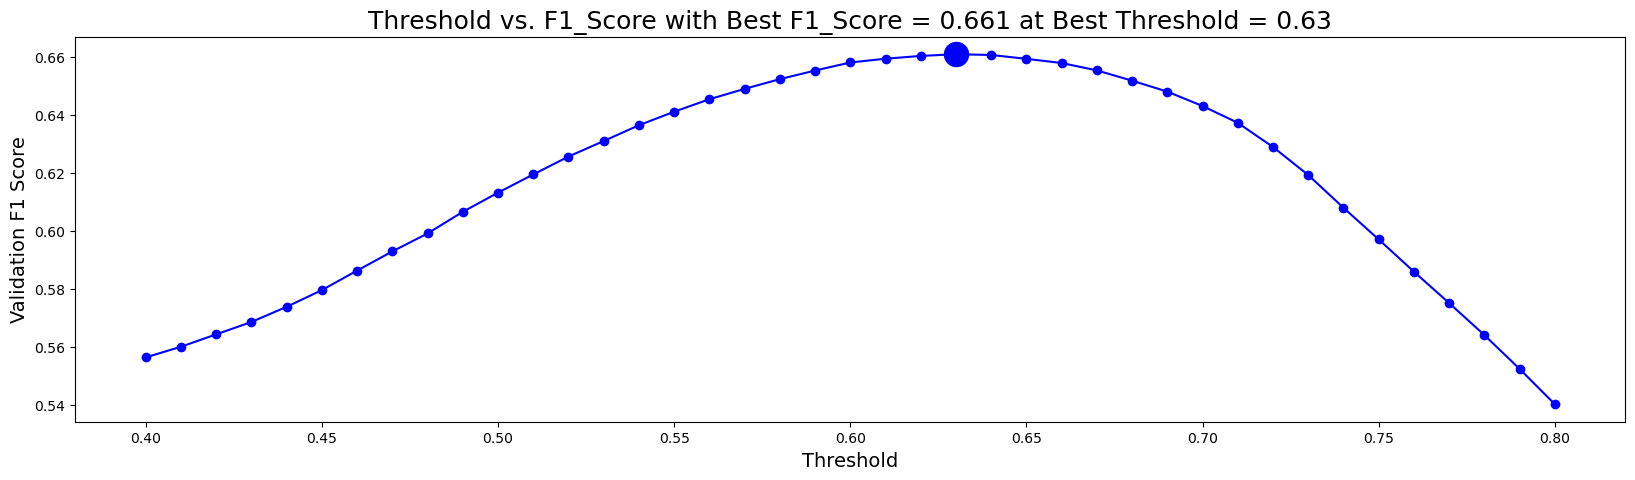

In [37]:
import matplotlib.pyplot as plt

# PLOT THRESHOLD VS. F1_SCORE
plt.figure(figsize=(20,5))
plt.plot(thresholds,scores,'-o',color='blue')
plt.scatter([best_threshold], [best_score], color='blue', s=300, alpha=1)
plt.xlabel('Threshold',size=14)
plt.ylabel('Validation F1 Score',size=14)
plt.title(f'Threshold vs. F1_Score with Best F1_Score = {best_score:.3f} at Best Threshold = {best_threshold:.3}',size=18)
plt.show()

In [38]:
print('When using optimal threshold...')
for k in range(18):
        
    # COMPUTE F1 SCORE PER QUESTION
    m = f1_score(true[k].values, (oof[k].values>best_threshold).astype('int'), average='macro')
    print(f'Q{k}: F1 =',m)
    
# COMPUTE F1 SCORE OVERALL
m = f1_score(true.values.reshape((-1)), (oof.values.reshape((-1))>best_threshold).astype('int'), average='macro')
print('==> Overall F1 =',m)

When using optimal threshold...
Q0: F1 = 0.5511777234800285
Q1: F1 = 0.4946370344945941
Q2: F1 = 0.48369340144040407
Q3: F1 = 0.5203604086012742
Q4: F1 = 0.4384117372136581
Q5: F1 = 0.5298364624697178
Q6: F1 = 0.5324714481164514
Q7: F1 = 0.4617786961066148
Q8: F1 = 0.5262828802806839
Q9: F1 = 0.3506259316822949
Q10: F1 = 0.5549693112459986
Q11: F1 = 0.4633227472982315
Q12: F1 = 0.4218044374631848
Q13: F1 = 0.5386907581057554
Q14: F1 = 0.3551834798927248
Q15: F1 = 0.426453072996281
Q16: F1 = 0.5077204200892635
Q17: F1 = 0.4873122959738847
==> Overall F1 = 0.6610269699322504
